In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# in house functions: 
%run 'DST_fun.ipynb' # model_report() and review_vector() 

# Load the dataset
train_df = pd.read_csv("../data/avis/train_noYC_lemma_sent_equil.csv", index_col=0)
feature_cols = ['n_avis','sentiment_norm','longueur_texte']+ [colname for colname in train_df.columns if "bank_" in colname] 

y_train = train_df.etoiles
X_train = train_df.drop("etoiles", axis = 1)
X_train = train_df[feature_cols]

test_df = pd.read_csv('../data/avis/test_noYC_lemma_sent_equil.csv', index_col=0)
y_test = test_df['etoiles']
X_test = test_df.drop("etoiles", axis =1)
X_test = test_df[feature_cols]

model_name = "Random Forest"

train_df.head(2)

,Unnamed: 0,user,etoiles,n_avis,date_avis,date_experience,Société,text_total,jour_avis,mois_avis,...,bank__ZELF,bank__bcfinance.fr,bank__floapay.com,bank__franfinance.fr,bank__ips,bank__laNef,bank__manager.one,bank__moneywalkie.com,bank__propulsebyca.fr,bank__qui-est-la-banque-la-moins-chere.com
5529,5529,Benjamin Danneville,5,-0.426925,2021-04-26,2021-04-26,Shine,Permet de faire des factures et des…Permet de ...,26,4,...,0,0,0,0,0,0,0,0,0,0
57109,120764,Gillot Frederic,5,-0.426925,2022-01-16,2022-01-16,Immoprt,"Bien accompagnéBien accompagné, sympathique, p...",16,1,...,0,0,0,0,0,0,0,0,0,0


train score:  0.53
              precision    recall  f1-score   support

           1       0.59      0.59      0.59       562
           2       0.44      0.48      0.46       562
           3       0.46      0.48      0.47       562
           4       0.51      0.38      0.44       562
           5       0.61      0.71      0.66       562

    accuracy                           0.53      2810
   macro avg       0.52      0.53      0.52      2810
weighted avg       0.52      0.53      0.52      2810



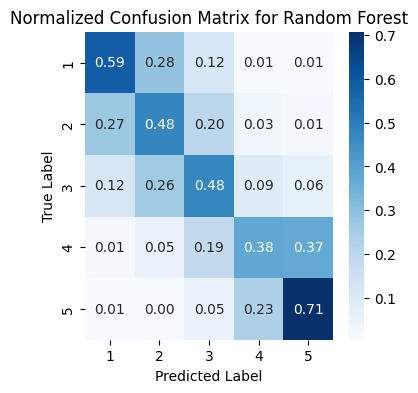

creating new csv for Random Forest


In [17]:
test_name =f"{model_name}- n_avis, sent, text length, companies"
# Vectorization des avis lémmatisés

# Train the Random Forest model
t0 = time.time()
model = RandomForestClassifier(n_estimators=10, max_depth=10,
                               random_state=7)
model.fit(X_train, y_train)
model_report(test_name, model_name)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.493 total time=   0.6s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.499 total time=   0.6s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.497 total time=   0.6s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.516 total time=   0.6s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.499 total time=   0.6s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.511 total time=   2.6s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.526 total time=   2.6s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.500 tot

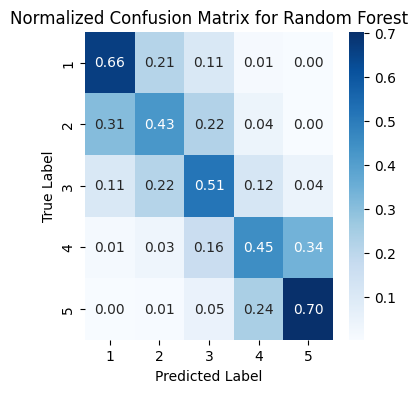

In [18]:
# Essai grid
test_name =f"{model_name}- GRID n_avis, sent, text length, companies"
# definir des hyper paramètres à tester
param_grid = {'n_estimators': [10, 50, 100, 200, 300],  
              'max_depth': [None, 10, 20, 30], 
              'min_samples_split': [2, 5, 10, 20, 30 ],
              'min_samples_leaf':[1, 2, 4]
              } 
# tester les différents paramètres
t0= time.time()
model = GridSearchCV(RandomForestClassifier(random_state=7), param_grid, cv = 5, n_jobs=-1, verbose = 3)
model.fit(X_train, y_train)
model_report(test_name, model_name)

train score:  0.42
              precision    recall  f1-score   support

           1       0.43      0.37      0.40       562
           2       0.39      0.16      0.23       562
           3       0.35      0.57      0.43       562
           4       0.37      0.15      0.22       562
           5       0.52      0.85      0.65       562

    accuracy                           0.42      2810
   macro avg       0.41      0.42      0.38      2810
weighted avg       0.41      0.42      0.38      2810



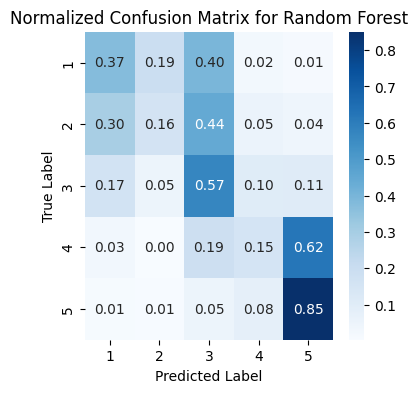

In [19]:
test_name =f"{model_name}- TFIDF, n_avis, sent, text length, companies"
# Vectorization des avis lémmatisés
X_train = review_vector(train_df,feature_cols)
X_test = review_vector(test_df,feature_cols)
# Train the Random Forest model
t0 = time.time()
model = RandomForestClassifier(n_estimators=10, max_depth=10,
                               random_state=7)
model.fit(X_train, y_train)
model_report(test_name, model_name)

In [20]:
# Essai grid
test_name =f"{model_name}- GRID TFIDF, n_avis, sent, text length, companies"
# definir des hyper paramètres à tester
param_grid = {'n_estimators': [10, 50, 100, 200, 300],  
              'max_depth': [None, 10, 20, 30], 
              'min_samples_split': [2, 5, 10, 20, 30 ],
              'min_samples_leaf':[1, 2, 4]
              } 
# tester les différents paramètres
t0= time.time()
model = GridSearchCV(RandomForestClassifier(random_state=7), param_grid, cv = 5, n_jobs=-1, verbose = 3)
model.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.547 total time=   1.8s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.521 total time=   1.8s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.548 total time=   1.8s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.545 total time=   1.8s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.524 total time=   1.8s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.573 total time=   9.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.593 total time=   9.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.566 tot

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 20, 30],
                         'n_estimators': [10, 50, 100, 200, 300]},
             verbose=3)

train score:  0.47
              precision    recall  f1-score   support

           1       0.56      0.48      0.51       562
           2       0.40      0.27      0.32       562
           3       0.37      0.54      0.44       562
           4       0.44      0.38      0.41       562
           5       0.61      0.70      0.65       562

    accuracy                           0.47      2810
   macro avg       0.47      0.47      0.47      2810
weighted avg       0.47      0.47      0.47      2810



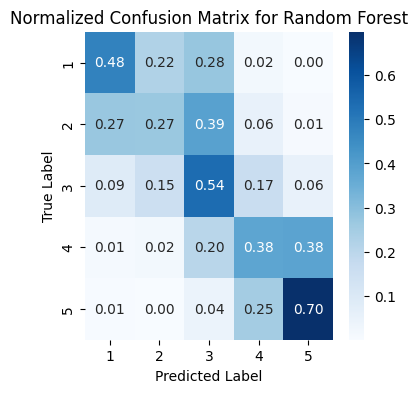

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [21]:
model_report(test_name, model_name)
print("Best parameters:", model.best_params_)

# Best score on test is .66 with Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

In [22]:
bench = pd.read_csv(f'../reports/benchmark/{model_name}_model_benchmark.csv', index_col=0).drop_duplicates(subset=['model'], keep= "last")
bench

,model,grid search,used/best params,score,precision,recall,f1,time_taken_mns,run_date
0,"RF- n_avis, sent, text length, companies",no,baseline hyperparameters,0.53,0.52,0.53,0.52,0.00,2024-02-07
0,"RF- GRID n_avis, sent, text length, companies",yes,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.55,0.55,0.55,0.55,9.41,2024-02-07
0,"RF- TFIDF, n_avis, sent, text length, companies",no,baseline hyperparameters,0.42,0.41,0.42,0.38,0.00,2024-02-07
0,"RF- GRID TFIDF, n_avis, sent, text length, com...",yes,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.47,0.47,0.47,0.47,11.39,2024-02-07
